# Overview of Montgomery County Salary Dataset

![banner.png](https://raw.githubusercontent.com/mj-awad17/Montgomery-County-Salary-Analysis/refs/heads/main/banner.png)

## Dataset Description
This dataset contains annual salary information, including gross pay and overtime pay, for all active, permanent employees of Montgomery County, MD, for the calendar year 2023. It serves as an excellent resource for analyzing salary disparities and relationships between department/division and salary, as well as the distribution of salaries across gender and grade levels. 
[[Dataset](https://www.kaggle.com/datasets/sahirmaharajj/employee-salaries-analysis/data)]

## Potential Analyses

1. **Gender Pay Gap Analysis**  
   Examine salary differences between genders within similar roles, grades, and departments to identify disparities that may need to be addressed.

2. **Departmental Salary Analysis**  
   Analyze the distribution of salaries across different departments and divisions to understand how compensation varies within the organization.

3. **Impact of Overtime and Longevity Pay**  
   Evaluate how overtime and longevity pay contribute to overall compensation and identify trends or patterns in these payments.

## Statistical and Machine Learning Applications
- **Predictive Modeling**: Use statistical models to predict base salaries based on factors such as department, grade, and length of service.
- **Machine Learning Techniques**: Apply machine learning to identify patterns, anomalies, and outliers in the salary data, highlighting instances of significant inequity.

## About the Author

The author of this notebook that's me [Muhammad Jawad](https://www.kaggle.com/mjawad17), passionate data scientist with a background in statistical analysis, machine learning, and data visualization. With a keen interest in leveraging data to drive decision-making and solve complex problems.

## Connect with the Author

- **LinkedIn**: [Profile](https://www.linkedin.com/in/muhammad-jawad-86507b201/)
- **GitHub**: [Profile](https://github.com/mj-awad17/)

Feel free to connect and explore more.

# 1. Load Data

In [70]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [71]:
# load dataset
df = pd.read_csv('/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv')
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [72]:
# check data shape
df.shape

(10291, 8)

In [73]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [74]:
# statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Base_Salary,10291.0,90312.165744,31240.842929,11147.24,70023.0,87328.00,108084.00,292000.00
Overtime_Pay,10291.0,8081.288954,16491.833017,0.00,0.0,258.42,9190.97,227428.99
Longevity_Pay,10291.0,1533.882816,3209.041070,0.00,0.0,0.00,1225.68,20279.46


## Observation 1
- Total rows `10291` and columns are `8` whereas five columns name as: `Department`, `Department_Name`, `Division`, `Gender` and `Grade` are object datatype and remaining `Base_Salary`, `Overtime_pay` and `Longevity_Pay` are float datatypes.
- Statistical analysis already showed about analysis of the three columns: `Base_Salary`, `Overtime_Pay` and `Longevity_pay`.
- Also there must be the null/missing values in the columns which will deal in processing phase.

# 2. Data Preprocessing

In [75]:
# check null values
df.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [76]:
# deleting empty rows form dataset
df = df.dropna()

In [77]:
df.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [78]:
# ANSI escape code for bold text
BOLD = '\033[1m'
END = '\033[0m'


# unique values on each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{BOLD}{column}{END}": {unique_values}\n')

Unique values in column "Department": ['ABS' 'BOA' 'BOE' 'CAT' 'CCL' 'CEC' 'CEX' 'COR' 'CUS' 'DEP' 'DGS' 'DHS'
 'DOT' 'DPS' 'ECM' 'FIN' 'FRS' 'HCA' 'HHS' 'HRC' 'IGR' 'LIB' 'MPB' 'NDA'
 'OAG' 'OAS' 'OCP' 'OFR' 'OGM' 'OHR' 'OIG' 'OLO' 'OLR' 'OMB' 'ORE' 'PIO'
 'POL' 'PRO' 'REC' 'SHF' 'TBS' 'ZAH']

Unique values in column "Department_Name": ['Alcohol Beverage Services' 'Board of Appeals Department'
 'Board of Elections' "County Attorney's Office" 'County Council'
 'Community Engagement Cluster' 'Offices of the County Executive'
 'Correction and Rehabilitation' 'Community Use of Public Facilities'
 'Department of Environmental Protection' 'Department of General Services'
 'Office of Emergency Management and Homeland Security'
 'Department of Transportation' 'Department of Permitting Services'
 'Ethics Commission' 'Department of Finance' 'Fire and Rescue Services'
 'Department of Housing and Community Affairs'
 'Department of Health and Human Services' 'Office of Human Rights'
 'Office of In

## Observation 2
- As we seen there are null values in `Grade` columns so we have to option to deal with them but as we know the column is object datatype so we drop those null rows.
- We see all the unique values of the each column, and we notice that just `Gender` column have bes categorical columns which we use for one-hot encoding techniques because the other categorical columns have not clarified the categorical.


- Just `gender` column is used for encoding for further next steps.

# 3. Data Visualization

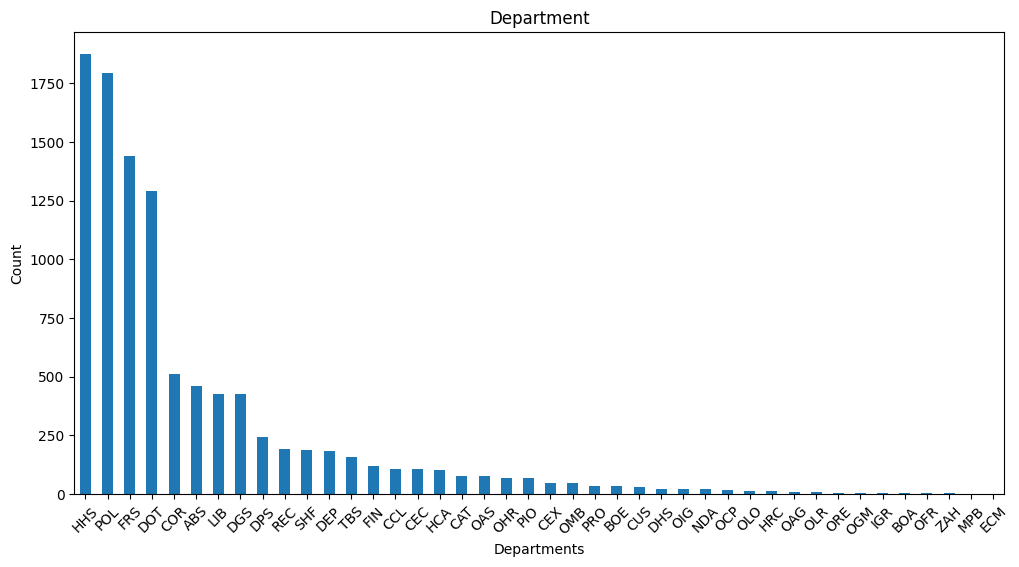

In [79]:
plt.figure(figsize=(12, 6))
df['Department'].value_counts().plot(kind='bar', title='Number of the Department')
plt.title('Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

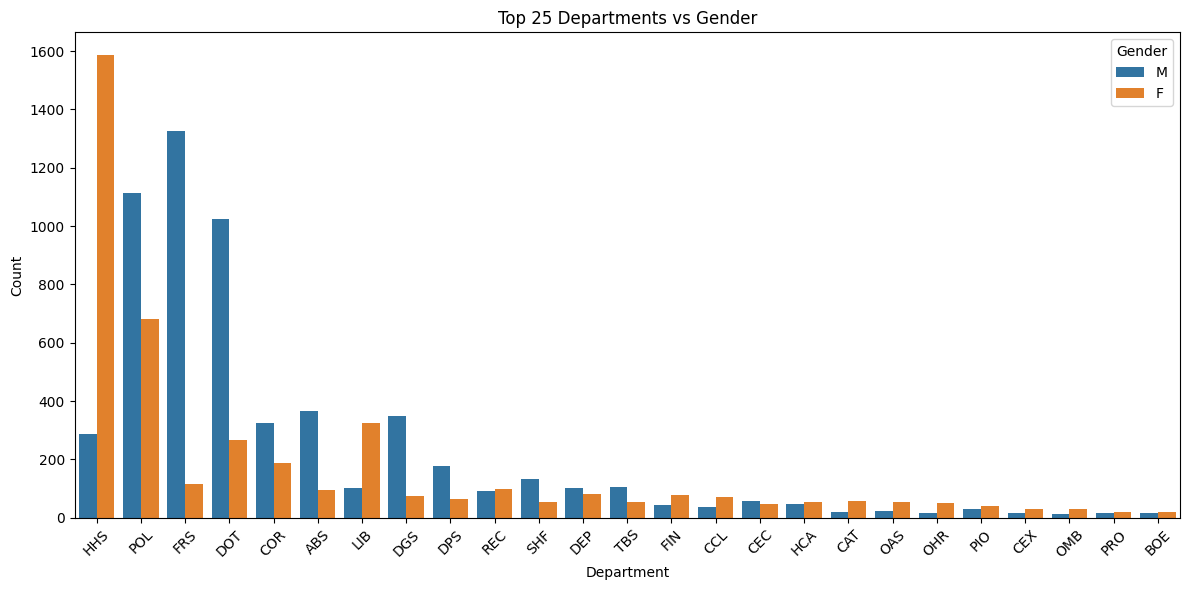

In [80]:
# Plot the visualization
plt.figure(figsize=(12, 6))

# order = df['Department'].value_counts().index
order = df['Department'].value_counts().nlargest(25).index

sns.countplot(x='Department', hue='Gender', data=df, order= order)
plt.title('Top 25 Departments vs Gender')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

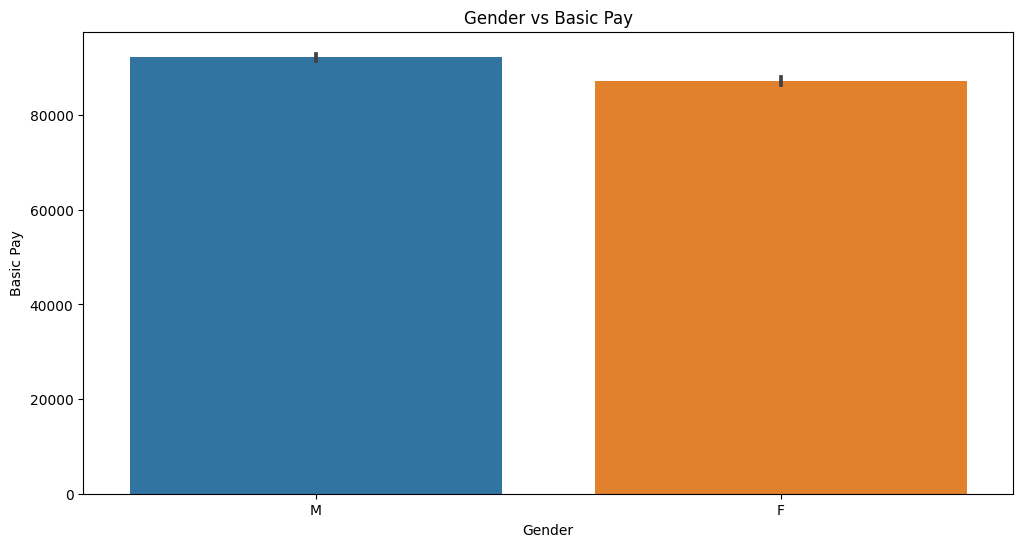

In [81]:
# gender pay count
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Base_Salary', data=df)
plt.title('Gender vs Basic Pay')
plt.xlabel('Gender')
plt.ylabel('Basic Pay')
plt.show()

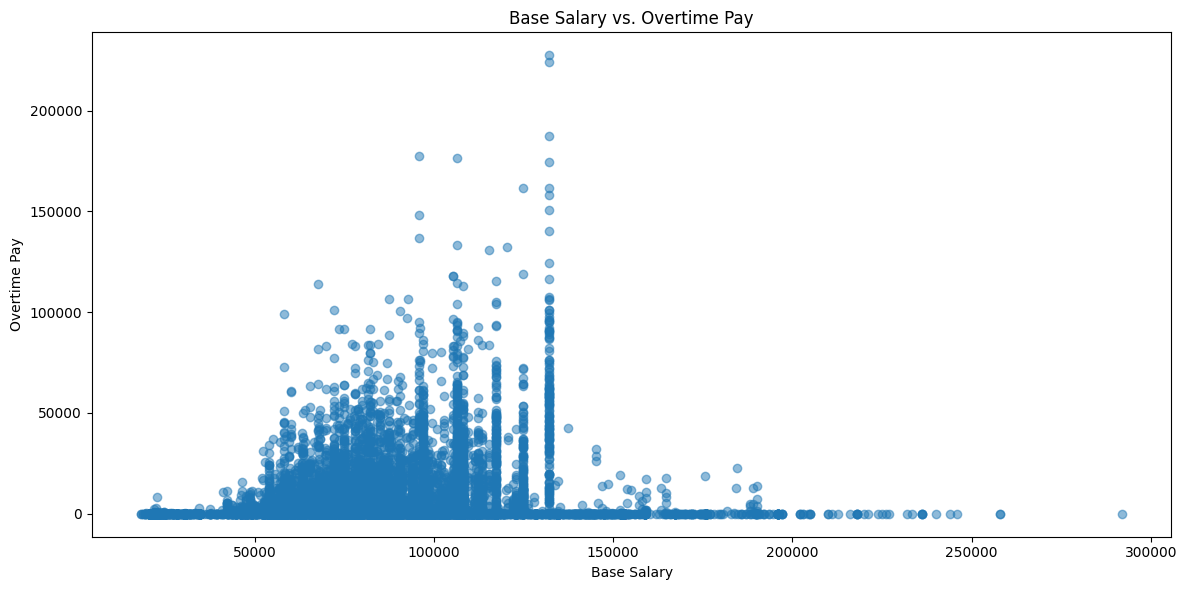

In [82]:
# Visualization 5: Scatter plot of base salary vs. overtime pay
plt.figure(figsize=(12, 6))
plt.scatter(df['Base_Salary'], df['Overtime_Pay'], alpha=0.5)
plt.title('Base Salary vs. Overtime Pay')
plt.xlabel('Base Salary')
plt.ylabel('Overtime Pay')
plt.tight_layout()
plt.show()

- Adding of all pays (Base + Overtime + Longevity)

In [83]:
# new column of Total Pay
df['Total_Pay'] = df['Base_Salary'] + df['Overtime_Pay'] + df['Longevity_Pay']

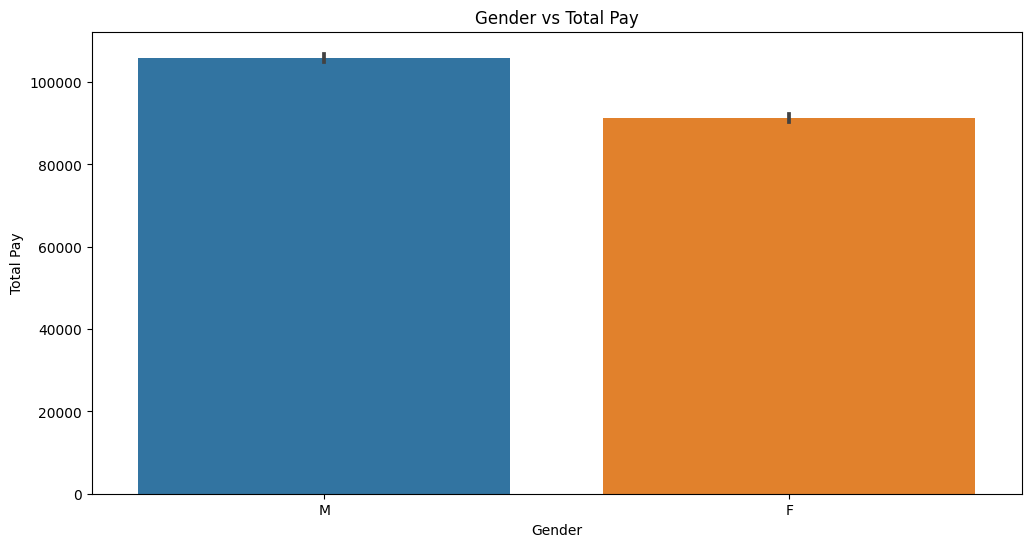

In [84]:
# gender vs total pay bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Total_Pay', data=df)
plt.title('Gender vs Total Pay')
plt.xlabel('Gender')
plt.ylabel('Total Pay')
plt.show()

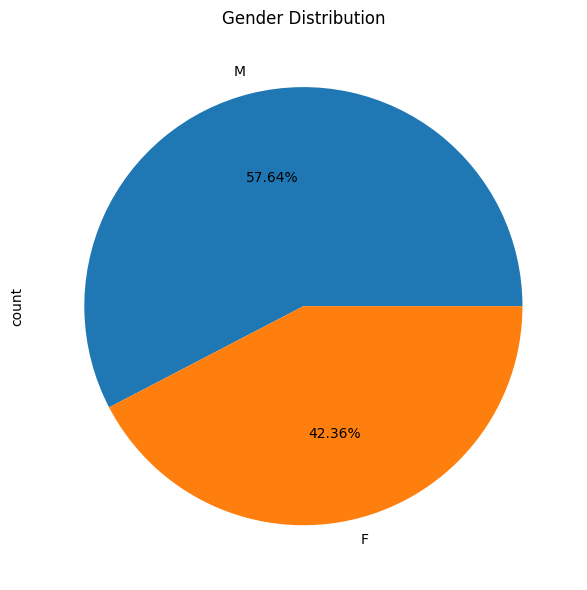

In [85]:
# Visualization 7: Pie chart of gender distribution
plt.figure(figsize=(12, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Gender Distribution')
# plt.ylabel('')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Division')

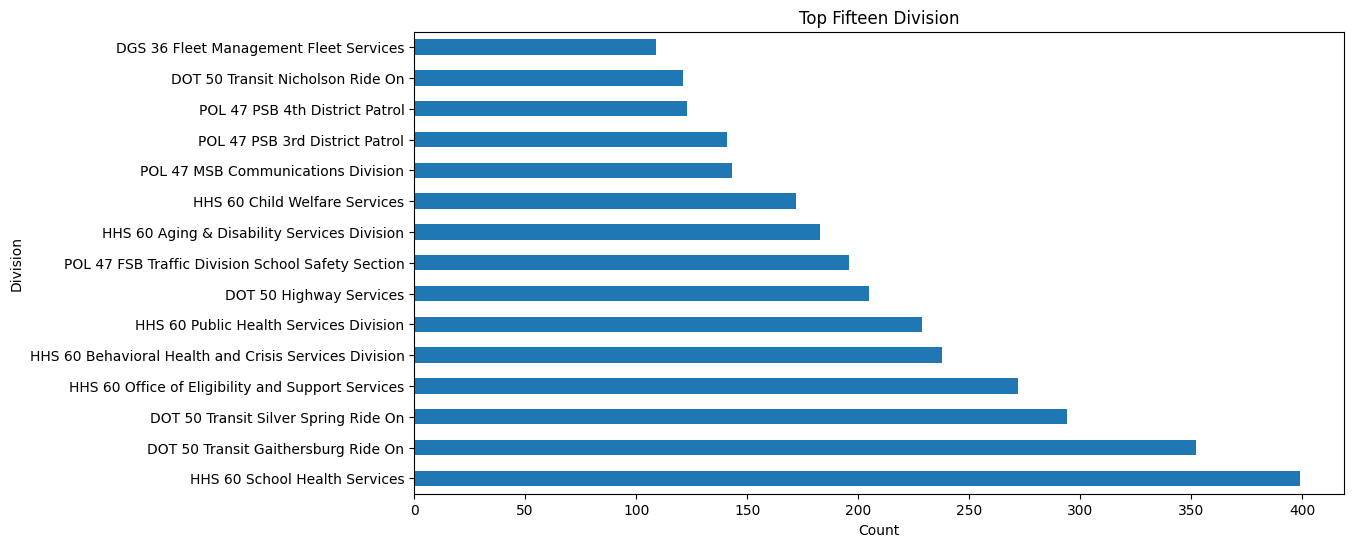

In [86]:
# horizontal barchart of division
plt.figure(figsize=(12, 6))
df['Division'].value_counts() \
  .head(15) \
  .plot(kind='barh', title='Top Fifteen Division')
plt.xlabel('Count')
plt.ylabel('Division')

<Figure size 1200x600 with 0 Axes>

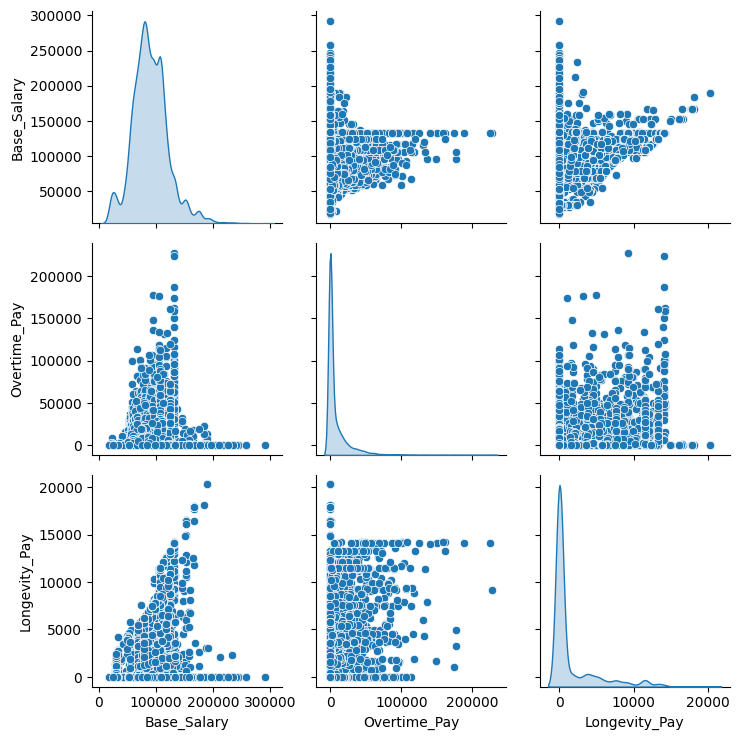

In [107]:
# Visualization 8: Pairwise scatter plot of numerical variables
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']], diag_kind='kde')
plt.tight_layout()
plt.show()

## Observation 3
- In top 25 departments the gender competition are very high but in **HHS** department the Female win whereas in **FRS** department Male on leads.
- By the gender distribution figure showed that the number of male employee are higher than female employees so in that case the the number of charging salaries of male employees are higher than females.


# 4. Model Building

**Note**: This model is just linear regression for implementing the understanding for linear regression moreover the working is simple and for share konwledge purpose only.

In [87]:
# copy the dataset 
df_copy = df.copy()

In [88]:
df_copy.head(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Pay
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2,175873.0000
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3,145613.3600
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3,136970.0000
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21,91922.6940
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16,85661.3800
5,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,98228.0000,518.80,998.28,21,99745.0800
6,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,82405.3864,549.20,0.00,18,82954.5864
7,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,93986.0000,1187.06,2452.94,N20,97626.0000
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.1500,0.00,9021.82,18,158485.9700
9,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.00,0.00,N25,117424.0000


## Import Libraries

In [89]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- Droping those columns which are not easy to handle in encoding techniques.

In [90]:
# drop columns
df_copy.drop(['Department', 'Department_Name','Division', 'Grade'],inplace=True,axis=1)

In [91]:
# Drop rows with missing values in critical columns
df_copy.dropna(subset=['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Gender', 'Total_Pay'], inplace=True)

The columns `Department`, `Department_Name`,`Division` and `Gender` are all categorial but Gender columns have just two categories as compared to the other columns which is ease to handle.

In [92]:
# One-hot encoding for categorical variables
df_copy_encoded = pd.get_dummies(df_copy, columns=['Gender'], drop_first=True)

## Define features and target variable

In [93]:
X = df_copy_encoded.drop('Total_Pay', axis=1)
y = df_copy_encoded['Total_Pay']

## Split the data into training and testing sets


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a linear regression model


In [95]:
model = LinearRegression()
model

LinearRegression()

In [96]:
# independent columns
X_train

,Base_Salary,Overtime_Pay,Longevity_Pay,Gender_M
59,59006.7205,2195.05,0.00,True
7707,98228.0000,0.00,4186.89,False
3429,107367.0021,1858.32,0.00,True
5422,99077.0057,0.00,0.00,False
10207,145833.0000,5140.66,0.00,True
...,...,...,...,...
5759,98228.0000,0.00,1596.27,False
5216,84000.0000,0.00,0.00,True
5415,96939.4318,0.00,0.00,False
885,92573.0000,97047.88,0.00,True


In [97]:
# dependent colums: Total_Pay
y_train

59        61201.7705
7707     102414.8900
3429     109225.3221
5422      99077.0057
10207    150973.6600
            ...     
5759      99824.2700
5216      84000.0000
5415      96939.4318
885      189620.8800
7298      47484.6196
Name: Total_Pay, Length: 8206, dtype: float64

## Fit the model to the training data


In [98]:
model.fit(X_train, y_train)

LinearRegression()

## Make predictions on the test set


In [99]:
y_pred = model.predict(X_test)
y_pred

array([107548.1365,  84887.595 , 119858.06  , ..., 146444.16  ,
        73696.347 ,  98228.    ])

In [100]:
# custom value prediction
model.predict([[98228.0000, 2195.05, 1596.27, 1]])

array([102019.32])

## Evaluate the model's performance


In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.7291783409393115e-21
R-squared: 1.0


## Plotting Actual vs Predicted Values


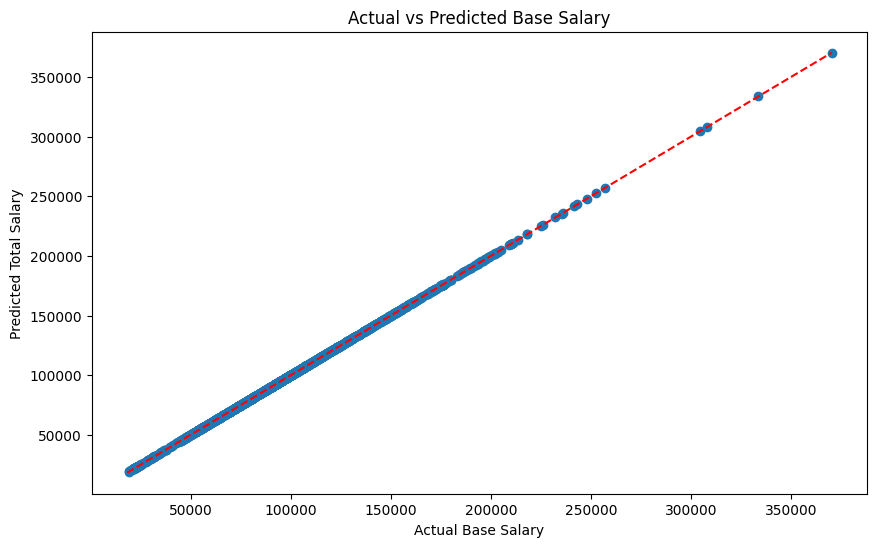

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # line for perfect predictions
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Total Salary')
plt.title('Actual vs Predicted Base Salary')
plt.show()

---

# 🎉 Thank You to Everyone Who Reviewed This Far! 🎉

🙏 I sincerely appreciate your support and interest! I am grateful to each and every one of you for taking the time to review this project. I hope the information I provided was useful and met your expectations. 🚀

💡 If you have any questions or feedback, please feel free to reach out! 💡